<a href="https://colab.research.google.com/github/szilaard/AIT_project/blob/main/AitProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIT Deep Learning Project

Péter Czumbel

Szilárd Horváth


In [1]:
import tensorflow as tf
import librosa
import pandas as pd
from glob import glob
import IPython
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

Downloading the GTZAN dataset from tensorflow datasets doesn't work, the URL times out.<br>
See: https://github.com/tensorflow/datasets/issues/4090 <br>
Using [this](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification) version of the dataset from kaggle instead.



We read all the data from the directories with glob.

In [5]:
audio_files = glob("Data/genres_original/*/*.wav")

In [6]:
n_fft = 2048
n_mfcc = 13
hop_length = 512
sample_rate = 22050
number_of_segments = 5
duration = 30
samples_per_track = sample_rate * duration

Example audio:

In [36]:
ipd.Audio(audio_files[0])

We read the raw data of the first audio sample and its sample frequency

In [8]:
signal, sr = librosa.load(audio_files[0], sr=sample_rate)
print("Y is a numpy array:", signal)
print("Shape of Y:", signal.shape)



Y is a numpy array: [ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]
Shape of Y: (661794,)


Plotting the waveforms of different music genres

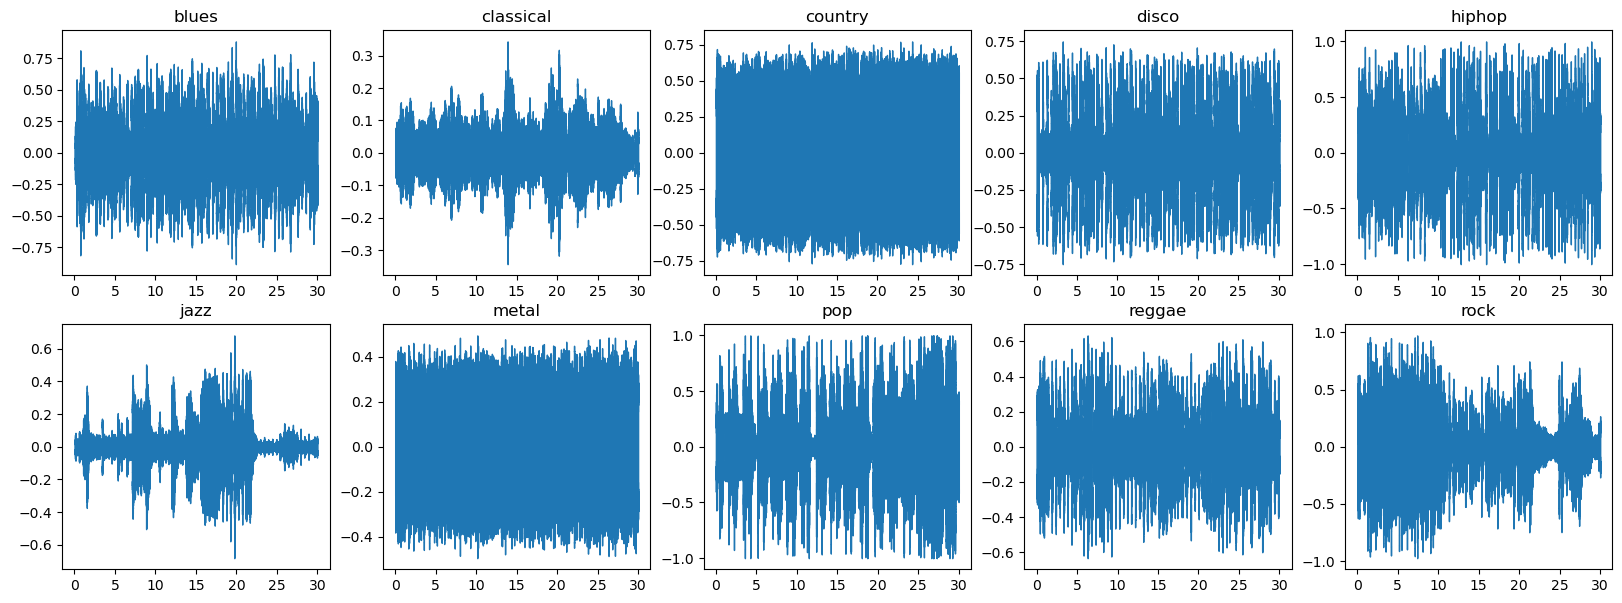

In [64]:
fig = plt.figure(figsize=(20, 7))
fig.tight_layout()
rows = 2
columns = 5
for i in range(1, columns * rows + 1):
    fig.add_subplot(rows, columns, i)
    signal, sr = librosa.load(audio_files[(i-1)*100], sr=sample_rate)
    librosa.display.waveshow(signal, sr=sample_rate)
    plt.title(audio_files[(i-1)*100].split("\\")[1])
    plt.xlabel("")
plt.show()


Short-time Fourier transformation

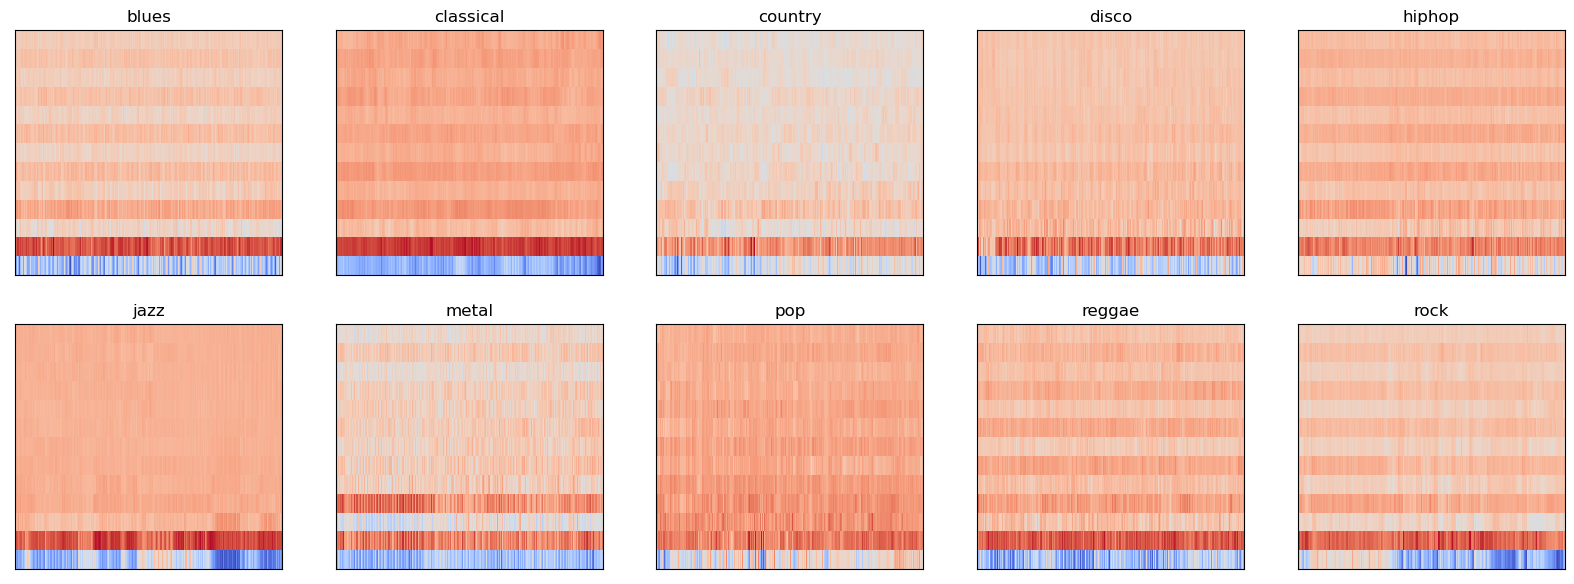

In [59]:
fig = plt.figure(figsize=(20, 7))
fig.tight_layout()
rows = 2
columns = 5
for i in range(1, columns * rows + 1):
    fig.add_subplot(rows, columns, i)
    signal, sr = librosa.load(audio_files[(i-1)*100], sr=sample_rate)
    mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    librosa.display.specshow(mfcc, sr=sample_rate, hop_length=hop_length)
    plt.title(audio_files[(i-1)*100].split("\\")[1])
plt.show()

In [50]:
data = {
    "mapping": [],
    "mfcc": [],
    "labels": []
}
samples_per_segment=int(samples_per_track/number_of_segments)

In [51]:
for audio_file in audio_files:
    label = audio_file.split("\\")[1]
    if label not in data["mapping"]:
        data["mapping"].append(label)
    try:
        signal, sr = librosa.load(audio_file)
    except:
        continue
    
    
    for i in range(number_of_segments):
        start = samples_per_segment * i
        end = start + samples_per_segment
        
        mfcc = librosa.feature.mfcc(y=signal[start:end], sr=sample_rate, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
        mfcc = mfcc.T
        data["mfcc"].append(mfcc)
        data["labels"].append(data["mapping"].index(label))
    
    
data["mapping"]

C:\Users\pczum\AppData\Local\Temp\ipykernel_16128\1403006445.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(audio_file)
d:\programs\anaconda3\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [32]:
data["mfcc"] = np.asarray(data["mfcc"])
data["labels"] = np.asarray(data["labels"])

print(data["mfcc"].shape)
print(data["labels"].shape)
data["labels"]

(4995,)
(4995,)


array([0, 0, 0, ..., 9, 9, 9])